8.881784197001252e-16 8.881784197001252e-16
2.220446049250313e-16 1.1102230246251565e-16
n3 max min 1.392811393197746 -1.375281964390827


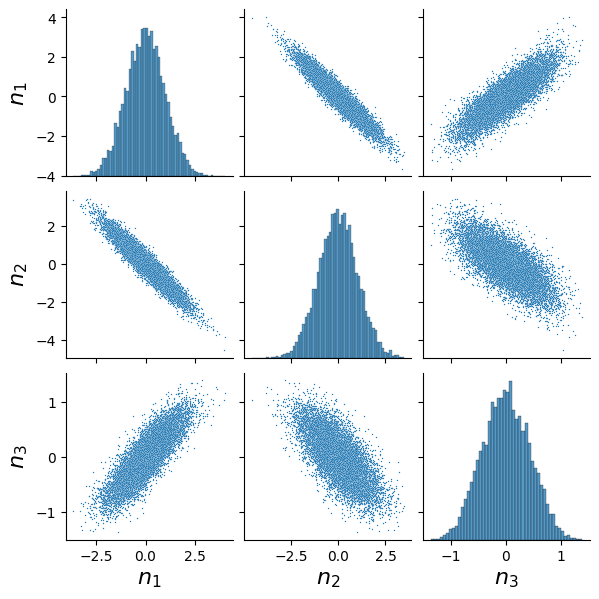

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子
seed=1
np.random.seed(seed)  # 42是一个任意的整数，你可以使用任何整数作为种子

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inv_sigmoid(y):
    return np.log(y/(1-y))

def get_noise(data):
    n3=data[:, 2]
    n2=data[:, 1]
    n1=data[:, 0]
    e2=(n1+n2)*3
    e3 = (n3-np.sin(np.pi*0.25*(0.5*n2+n1)))*5.0
    return e2, e3

def get_n3(e3, n1, n2):
    n3 = np.sin(np.pi*0.25*(0.5*n2+n1))+e3/5.0
    return n3

def get_n2(e2, n1):
    n2=-n1+e2/3.0
    return n2
    
    

def get_toy(n_samples=10000):
    n1=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    e2=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    n2 = -n1+e2/3.0 #-3*sigmoid(n1+e2)
    e3=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    # n3=(n1)**2+(n2)**3+ e3**3
    n3=np.sin(np.pi*0.25*(0.5*n2+n1))+e3/5.0
    data_vis =np.concatenate((n1, n2, n3), axis=1) #, n1+0.5*n2
    data =np.concatenate((n1, n2, n3), axis=1)
    noise = np.concatenate((e2, e3), axis=1)
    return data, noise, data_vis
    # return data

data, noise, data_vis=get_toy()
data_test, noise_test, _=get_toy()

# name='toy_dataset/toy5_'+str(seed)+'.npy'
# name_test='toy_dataset/toy5_'+str(seed)+'test.npy'
# print(name)
# np.save(name, data)
# np.save(name_test, data_test)

# data1=np.load(name)
# print(data1.shape, np.abs(data-data1).max())



pred_e2, pred_e3=get_noise(data)
print(np.abs(noise[:, 0]-pred_e2).max(), np.abs(noise[:, 1]-pred_e3).max()) 
pred_n2=get_n2(pred_e2, data[:, 0])
pred_n3=get_n3(pred_e3, data[:, 0], data[:, 1])

print(np.abs(data[:, 1]-pred_n2).max(), np.abs(data[:, 2]-pred_n3).max()) 
print('n3 max min', data[:, 2].max(), data[:,2].min())
# print(data.shape)

def normalize_tensor(tensor):
    # 计算每一列的最大值和最小值
    min_vals = np.min(tensor, axis=0)
    max_vals = np.max(tensor, axis=0)

    # 计算范围
    range_vals = max_vals - min_vals

    # 进行归一化操作
    normalized_tensor = -1 + 2 * (tensor - min_vals) / range_vals

    return normalized_tensor

import pandas as pd
df = pd.DataFrame(data_vis, columns=['$n_1$', '$n_2$', '$n_3$']) #,, 'n1+0.5*n2'
# normalize_tensor(data_test)
# 绘制两两变量之间的散点图，调整节点大小
plot_kws = {'s': 1}
g = sns.pairplot(df, diag_kind='hist', height=2, plot_kws=plot_kws)
# 循环遍历子图并设置坐标轴标签的字体大小
label_fontsize=16
for ax in g.axes.flat:
    ax.xaxis.label.set_fontsize(label_fontsize)
    ax.yaxis.label.set_fontsize(label_fontsize)
plt.savefig('paper_pdf/toy1_corr.png')
# 显示图形
plt.show()


